In [6]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

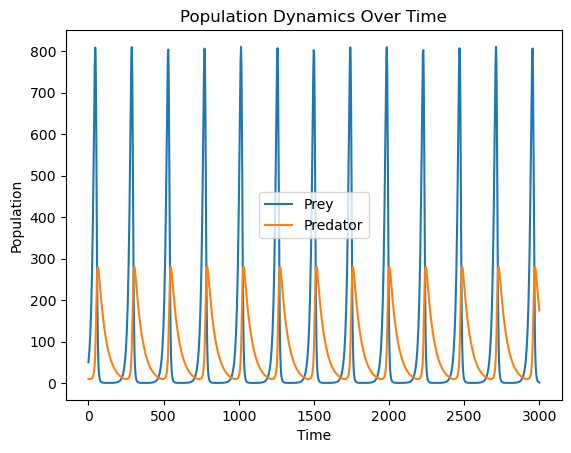

In [13]:
# Model 1: 1 predator, 1 prey without carrying capacity

# x = population density of prey
# y = population density of predator

a = 0.08 # 0.5 # prey growth rate
b = 0.001 # 0.1 # predator kill rate
c = 0.02 # 0.1 # predator death rate
d = 0.0002 # 0.1 # predator growth rate from eating prey

# defining the Lotka-Volterra differential equations
def dSdt(S, t):
    x, y = S
    return [a*x - b*x*y,
            -c*y + d*x*y
           ]

x0 = 50 # initial prey population
y0 = 10 # initial predator populations
S0 = (x0, y0)

t = np.linspace(0, 3000, 1000) # time array

sol1 = odeint(dSdt, S0, t) # solving differential equations

sol_x1 = sol1[:, 0] # prey population over time
sol_y1 = sol1[:, 1] # predator population over time

# Plotting populations over time
plt.plot(t, sol_x1, label = "Prey")
plt.plot(t, sol_y1, label = "Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time")
plt.show()

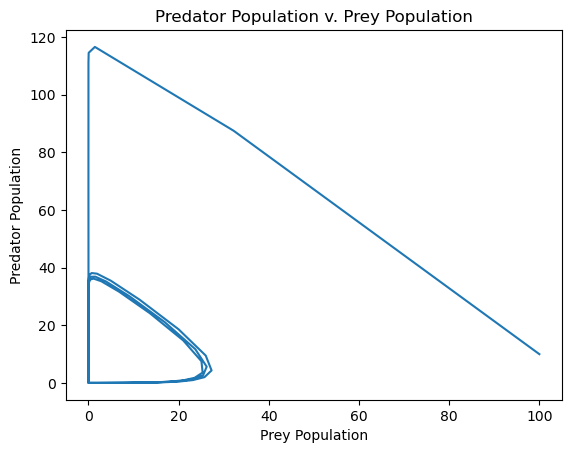

In [3]:
# Plotting the prey v. predator phase plane
plt.plot(sol_x1, sol_y1)
plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.title("Predator Population v. Prey Population")
plt.show()

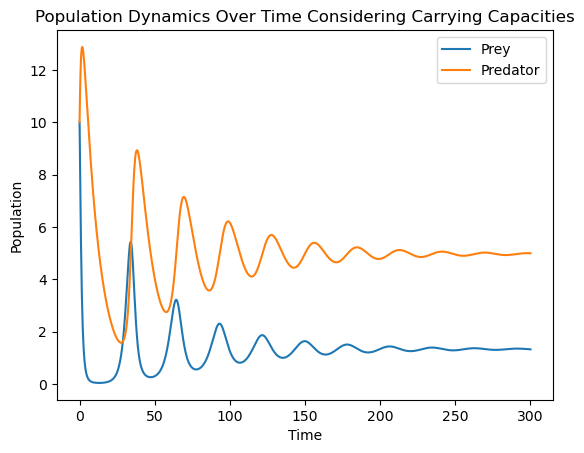

In [4]:
# Model 2: 1 predator, 1 prey with carrying capacity

# carrying capacity of an environment = the maximum population size of a biological species that can be 
# sustained by that specific environment, given the food, habitat, water, and other resources available (Wikipedia)

k1 = 200 # carrying capacity of prey population
k2 = 20 # carrying capacity of predator population

def dSdt(S, t):
    x, y = S
    return [a*x*(1-x/k1) - b*x*y,
            -c*y + d*x*y*(1-y/k2)
           ]

x0 = 10 # initial prey population
y0 = 10 # initial predator populations
S0 = (x0, y0)

t = np.linspace(0, 300, 1000) # time array

sol2 = odeint(dSdt, S0, t) # solving differential equations

sol_x2 = sol2[:, 0] # prey population over time
sol_y2 = sol2[:, 1] # predator population over time

# Plotting populations over time
plt.plot(t, sol_x2, label = "Prey")
plt.plot(t, sol_y2, label = "Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time Considering Carrying Capacities")
plt.show()

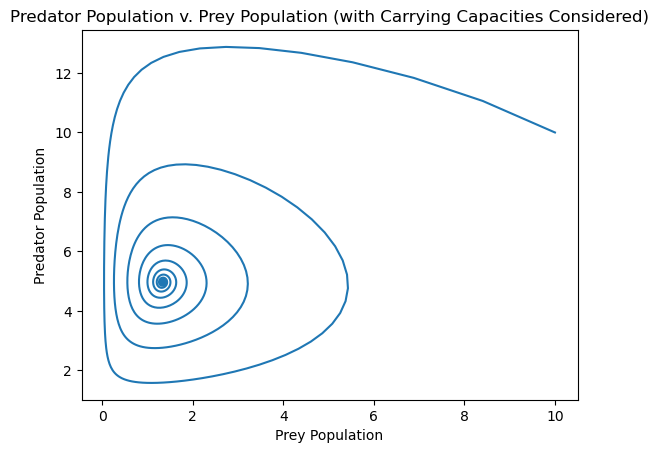

In [5]:
# Plotting the prey v. predator phase plane
plt.plot(sol_x2, sol_y2)
plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.title("Predator Population v. Prey Population (with Carrying Capacities Considered)")
plt.show()